In [54]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [36]:
#make circles
circle_x,circle_y = make_circles(n_samples=1000,factor=.5,noise=.05,random_state=0)
ed_mat_circles = euclidean_distances(circle_x)

In [13]:
#make moons
moon_x,moon_y = make_moons(n_samples=1000,noise=.05,random_state=0)
ed_mat_moons = euclidean_distances(moon_x)

In [51]:
#make blobs
blob_x,blob_y = make_blobs(n_samples=1500,random_state=0)
ed_mat_blobs = euclidean_distances(blob_x)

In [58]:
blob_x = pd.read_csv('blobs.csv')
blob_x = blob_x.values
ed_mat_blobs = euclidean_distances(blob_x)

In [20]:
def rangeQuery(ed_mat,eps,point_id):
    n_points = ed_mat.shape[1]
    seeds = []
    for i in range(0, n_points):
        if ed_mat[point_id][i]<eps:
            seeds.append(i)
    return seeds

In [44]:
def expandCluster(ed_mat,point_id,eps,min_points,cluster_label,c_id,neighbors):
    cluster_label[point_id] = c_id
    neighbors_of_each_neighbor = []
    each_neighbor_id = 0
    while each_neighbor_id < len(neighbors):
        
        if(cluster_label[neighbors[each_neighbor_id]] == -1): #noise
            cluster_label[neighbors[each_neighbor_id]] = c_id
            
        elif cluster_label[neighbors[each_neighbor_id]] == 0: #if label not assigned
             cluster_label[neighbors[each_neighbor_id]] = c_id
        
        neighbors_of_each_neighbor = rangeQuery(ed_mat,eps,neighbors[each_neighbor_id])
            
        if len(neighbors_of_each_neighbor)>=min_points:
            for each_neighbor in neighbors_of_each_neighbor:
                if each_neighbor not in neighbors:
                    neighbors.append(each_neighbor)
        
        each_neighbor_id+=1
    return cluster_label
            
        

In [43]:
def DBScan(x,ed_mat,eps,min_points):
    cluster_label ={}
    c_id = 0
    neighbor_point_list = []
    #initialize each cluster id ed_mat
    for point_id in range(x.shape[0]):
        cluster_label[point_id] = 0
    for point_id in range(x.shape[0]):
        if not(cluster_label[point_id]==0):
            continue
        neighbor_point_list = rangeQuery(ed_mat,eps,point_id)
        #print(type(neighbor_point_list))
        #print(len(neighbor_point_list[point_id]))
        if len(neighbor_point_list) < min_points:    
            cluster_label[point_id] = -1 #considering it as noise
            
        else:  
            c_id+=1
            cluster_label = expandCluster(ed_mat,point_id,eps,min_points,cluster_label,c_id,neighbor_point_list)
    return list(cluster_label.values()) 
    
    
    

In [29]:
def visualize_clusters(points,y_pred):
    x_values = []
    y_values = []
    for x,y in points:
        #print(x)
        #print(y)
        x_values.append(x)
        y_values.append(y)
    plt.scatter(x_values,y_values,c=y_pred)

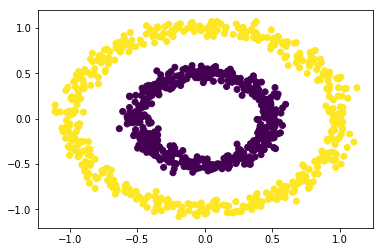

In [47]:
y_pred_circle = DBScan(circle_x,ed_mat_circles,0.1,3)
visualize_clusters(circle_x,y_pred_circle)

<class 'list'>
<class 'list'>


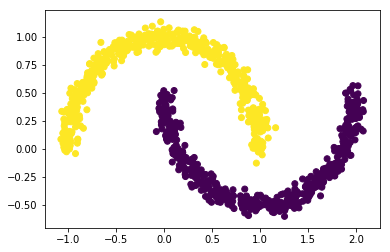

In [41]:
y_pred_moon = DBScan(moon_x,ed_mat_moons,0.1,3)
visualize_clusters(moon_x,y_pred_moon)

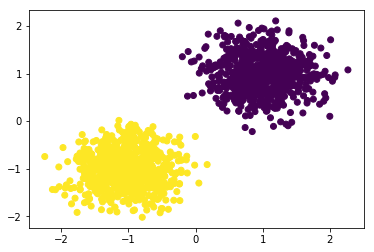

In [60]:
y_pred_blob = DBScan(blob_x,ed_mat_blobs,0.5,3)
visualize_clusters(blob_x,y_pred_blob)